<a href="https://colab.research.google.com/github/o-semenkova/ml_home_tasks/blob/main/HW_2_1_%D0%90%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA_%D0%B4%D0%BB%D1%8F_%D0%BF%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B8_%D0%BB%D1%96%D0%BD%D1%96%D0%B8%CC%86%D0%BD%D0%BE%D1%96%CC%88_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%96%CC%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import drive

In [2]:
drive.mount('/content/drive')
medical_charges_raw = pd.read_csv("/content/drive/MyDrive/colab_notebooks/machine-learning-by-hanna-pylieva/ml-course-notebooks/data/medical-charges.csv")

Mounted at /content/drive


In [3]:
medical_charges_raw.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Моi гiпотези щодо прогнозування charges:
1. Charges буде зростати базуючись на зростаннi age + bmi + smoker, тобто цi ознаки будуть головними впливаючими на нього. Тому ми можемо спробувати зробити унiфiкований механiзм пiдбору таких значень цих ознак, щоб прогнозувати charges, задавши що вонi мають прiорiтет впливу **1**
2. Ознака region на мою думку може мати прiорiтет впливу **2** (наприклад регiон може бути з ризикованими умовами для життя, наприклад бiля дiючого вулкану)
3. sex та children на мою думку взагалi не будуть впливати на charges, тому що це б могло привести до збiльшення судових позовiв (дискримiнацiя по статi/кiлькостi дiтей), тому прiорiтет впливу у них **3**

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [15]:
from scipy import stats
def create_plot(data, title):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    fig.suptitle(title, fontsize=16)

    sns.histplot(data, bins=20, ax=axs[0])
    axs[0].set_title('Histogram')

    stats.probplot(data, dist="norm", plot=axs[1])
    axs[1].set_title('Probability Plot')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

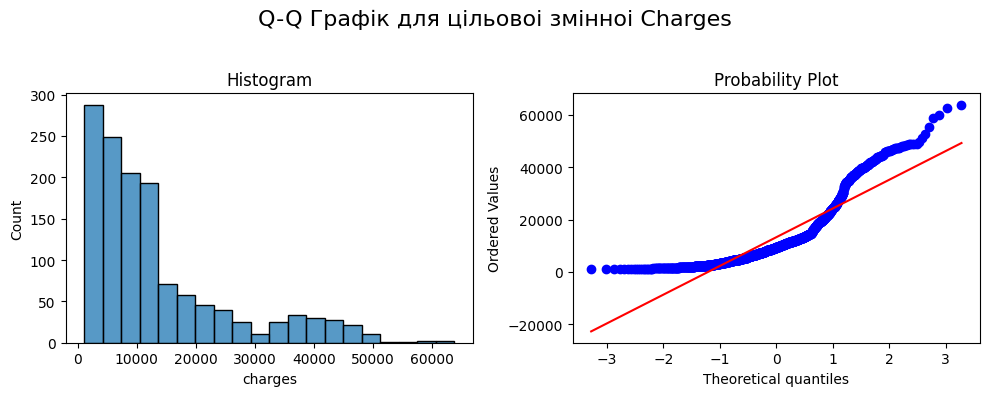

In [16]:
create_plot(medical_charges_raw.charges, 'Q-Q Графік для цiльовоi змiнноi Charges')

**Спостереження**

- Розподiл `charges`право-скошений
- Також проглядаеться невелика бiмодальнiсть

In [17]:
fig = px.histogram(medical_charges_raw,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'orange'],
                   title='Annual Medical Charges based on sex')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження**
- Середнi значення `charges` для чоловiкiв та жiнок майже однакові: **9369** (чоловiки) та **9412** (жiнки)
- Значення `charges`, вище якого знаходяться 25% чоловiкiв значно вище, нiж те ж значення у жiнок: **19** тис. проти **14** тис.
- Максимальне значення `charges` у чоловiкiв значно вище, нiж те ж значення у жiнок: **40** тис. проти **28** тис.
- Маемо окремi цiкавi викиди `charges` бiльше 50 тис. i у чоловiкiв i у жiнок, це потребуе додакового аналiзу (можливо мае сенс вiдокремити данi по цим людям в окремий датафрейм)

In [5]:
fig = px.histogram(medical_charges_raw,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['green', 'red', 'orange', 'purple'],
                   title='Annual Medical Charges based on region')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження**

- Середнi значення `charges` по `region` майже однакові, але можемо бачити, що люди з заходу платять у середньому трохи вище нiж люди зi сходу:
  - **10 тис.** (northeast)
  - **8.9 тис.** (northwest)
  - **9.2 тис.** (southeast)
  - **8.7 тис.** (southwest)
- Значення `charges`, вище якого знаходяться 25% даних значно вище у тих, хто живе на заходi
- Максимальне значення `charges` значно вище у тих, хто живе на заходi
- Маемо окремi цiкавi викиди `charges` бiльше 50 тис. i у людей зi всiх регiонiв, це потребуе додакового аналiзу (можливо мае сенс вiдокремити данi по цим людям в окремий датафрейм)

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [19]:
fig = px.histogram(medical_charges_raw,
                   x='region',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['red', 'green'],
                   title='Region based on smoker')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження**

- можемо бачити, що люди з southeast мають значно бiльше курцiв вище нiж люди зi iнших регiонiв:
  - **67** (northeast)
  - **58** (northwest)
  - **91** (southeast)
  - **58** (southwest)
  
**Можливо саме цей факт е причиною того, що люди з заходу мають вищий charges нiж люди зi сходу**

In [24]:
medical_charges_raw['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [20]:
fig = px.histogram(medical_charges_raw,
                   x='children',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['red', 'green'],
                   title='Children based on smoker')
fig.update_layout(bargap=0.1)
fig.show()

In [35]:
absent_children_smokers = (115 * 100) / 574
print("Smokers without children: " + str(absent_children_smokers) + "%")

one_child_smokers_persent = (61 * 100) / 324
print("Smokers with 1 child: " + str(one_child_smokers_persent) + "%")

two_child_smokers_persent = (55 * 100) / 240
print("Smokers with 2 children: " + str(two_child_smokers_persent) + "%")

three_child_smokers_persent = (39 * 100) / 157
print("Smokers with 3 children: " + str(three_child_smokers_persent) + "%")

four_child_smokers_persent = (3 * 100) / 25
print("Smokers with 4 children: " + str(four_child_smokers_persent) + "%")

five_child_smokers_persent = (1 * 100) / 18
print("Smokers with 5 children: " + str(five_child_smokers_persent) + "%")

Smokers without children: 20.034843205574912%
Smokers with 1 child: 18.82716049382716%
Smokers with 2 children: 22.916666666666668%
Smokers with 3 children: 24.840764331210192%
Smokers with 4 children: 12.0%
Smokers with 5 children: 5.555555555555555%


**Спостереження**

- можемо бачити, що люди з 3 дiтьми значно бiльше курять нiж люди без дiтей:
  - Smokers without children: 20.034843205574912%
  - Smokers with 1 child: 18.82716049382716%
  - Smokers with 2 children: 22.916666666666668%
  - Smokers with 3 children: 24.840764331210192%
  - Smokers with 4 children: 12.0%
  - Smokers with 5 children: 5.555555555555555%
- також менше курцiв серед людей з 4 або 5 дiтьми, але ми маемо дуже мало даних, щоб це стверджувати

**Споглядаючи на все це, маю скорiше за все змiнити свою думку щодо впливу кiлькостi дiтей на величину charges :)**

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [39]:
fig = px.violin(medical_charges_raw,
                   x='charges',
                   color='children',
                   color_discrete_sequence=['red', 'green', 'blue', 'orange', 'purple', 'yellow'],
                   title='Charges based on children')
fig.update_layout(bargap=0.1)
fig.show()

**Спостереження**

- можемо бачити, що люди без дiтей та батьки з 3 дiтьми (ймовiрно тому, що саме вони найбiльшi курцi) мають значно бiльше платити нiж люди з 2/4/5 дiтьми:
  - **Max Charges for people without children: 63 770**
  - Max Charges for people with 1 child: 58 571
  - Max Charges for people with 2 children: 49 577
  - **Max Charges for people with 3 children: 60 021**
  - Max Charges for people with 4 children: 40 182
  - Max Charges for people with 5 children: 19 023

**Завдання 5.** Розглянемо модель для користувачів, які не є курцями (`no_smoker_df`):

$$charges = w \times age + b$$

Спробуйте 3 різні пари параметрів `w` та `b` аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції `estimate_charges` та `try_parameters`. Опишіть спостереження.
Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [40]:
non_smoker_df = medical_charges_raw[medical_charges_raw.smoker == 'no']

In [41]:
def estimate_charges(age, w, b):
    return w * age + b

In [42]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

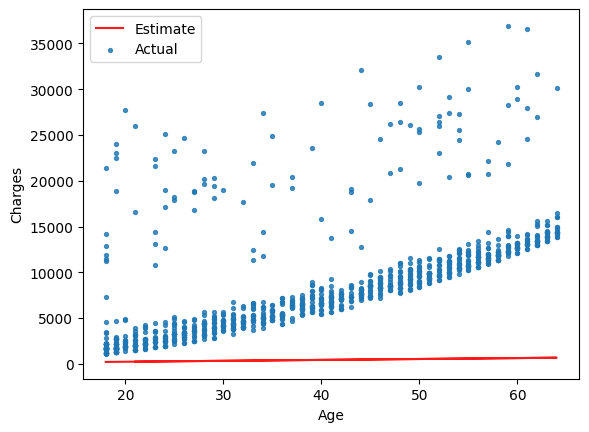

In [43]:
# Для першоi прогонки берем параметри "з потолка"

try_parameters(non_smoker_df, 10, 30)

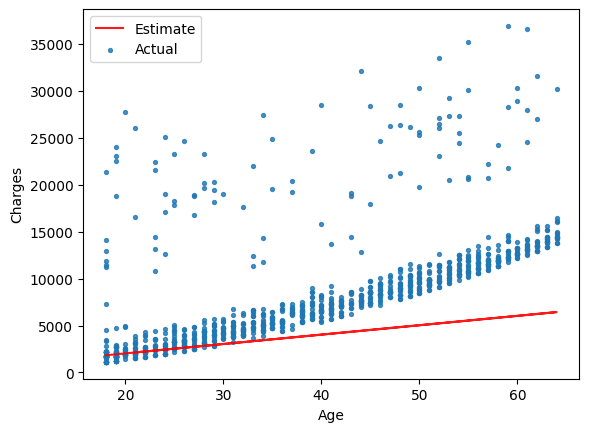

In [46]:
# Намагаемося змiнити кут нахилу

try_parameters(non_smoker_df, 100, 30)

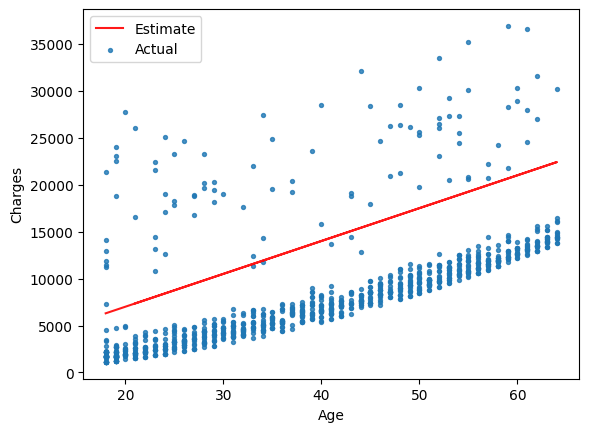

In [60]:
# Ця лiнiя найбiльше схожа на ту, що нам потрiбна для вираження тренду зростання витрат та прогнозування майбутнiх трат

try_parameters(non_smoker_df, 350, 0.05)

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [78]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

targets = non_smoker_df['charges']

w = 10
b = 30
predicted = estimate_charges(non_smoker_df.charges, w, b)
loss = rmse(targets, predicted)

print(loss)

w = 100
b = 30
predicted = estimate_charges(non_smoker_df.charges, w, b)
loss = rmse(targets, predicted)
print(loss)

w = 350
b = 0.05
predicted = estimate_charges(non_smoker_df.charges, w, b)
loss = rmse(targets, predicted)
print(loss)

w = 1
b = 2
predicted = estimate_charges(non_smoker_df.charges, w, b)
loss = rmse(targets, predicted)
print(loss)

93133.59737750466
1024224.9746420947
3610565.4983121627
2.0
